# Previs√£o de Custo Anual ‚Äì Sa√∫deViva  
Este projeto apresenta um estudo baseado na empresa fict√≠cia **Sa√∫deViva**, que oferece planos personalizados com previs√µes de custo calculadas via Machine Learning.  

A an√°lise considera fatores individuais como idade, altura, peso, tabagismo, n√∫mero de filhos e regi√£o de resid√™ncia para garantir maior transpar√™ncia na precifica√ß√£o.  

# Coleta de dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from src.utils import carregar_dados
raw = carregar_dados(caminho="dados/Train_Data.csv")

# Entendimento dos dados

In [3]:
# Visualiza√ß√£o do dataframe
display(raw)

age     sex        bmi smoker     region  children       charges
0     21.000000    male  25.745000     no  northeast         2   3279.868550
1     36.976978  female  25.744165    yes  southeast         3  21454.494239
2     18.000000    male  30.030000     no  southeast         1   1720.353700
3     37.000000    male  30.676891     no  northeast         3   6801.437542
4     58.000000    male  32.010000     no  southeast         1  11946.625900
...         ...     ...        ...    ...        ...       ...           ...
3625  48.820767  female  41.426984     no  northwest         4  10987.324964
3626  38.661977  female  26.202557     no  southeast         2  11735.844352
3627  56.000000    male  40.300000     no  southwest         0  10602.385000
3628  48.061207  female  34.930624     no  southeast         1   8976.140452
3629  37.598865  female  25.219233     no  northeast         3   7027.698968

[3630 rows x 7 columns]

# An√°lise Explorat√≥ria de Dados (EDA)

In [4]:
# Quantidade de linhas
# Quantidade de colunas
# Nome de cada coluna
# Quantos valores n√£o-nulos existem em cada coluna
# O tipo de dado em cada coluna
# Uso de mem√≥ria pelo DataFrame
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


In [5]:
# Quantos valores nulos existem em cada coluna
raw.isnull().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

In [6]:
# Estat√≠stica descritiva das colunas num√©ricas
# count: quantidade de valores n√£o nulos
# mean: m√©dia
# std: desvio padr√£o
# min: 00% (valor m√≠nimo)
# Q1: 25%
# Q2: 50% (mediana)
# Q3: 75%
# max: 100% (valor m√°ximo)
print(raw.describe(include=[np.number]))

               age          bmi     children       charges
count  3630.000000  3630.000000  3630.000000   3630.000000
mean     38.887036    30.629652     2.503581  12784.808644
std      12.151029     5.441307     1.712568  10746.166743
min      18.000000    15.960000     0.000000   1121.873900
25%      29.000000    26.694526     1.000000   5654.818262
50%      39.170922    30.200000     3.000000   9443.807222
75%      48.343281    34.100000     4.000000  14680.407505
max      64.000000    53.130000     5.000000  63770.428010


In [7]:
# Estat√≠stica descritiva das colunas object
# unique: quantidade de valores diferentes
# top: qual √© a moda da coluna
# freq: quantas vezes cada moda se repete
print(raw.describe(include="object"))

         sex smoker     region
count   3630   3630       3630
unique     2      2          4
top     male     no  southeast
freq    2029   3070       1021


In [8]:
# Moda de cada coluna
print(raw.mode().iloc[[0]])

    age   sex   bmi smoker     region  children   charges
0  19.0  male  32.3     no  southeast       0.0  1137.011


In [9]:
# N√∫mero de valores √∫nicos em cada coluna
raw.nunique()

age         1589
sex            2
bmi         2322
smoker         2
region         4
children       6
charges     2951
dtype: int64

In [10]:
# Visualiza√ß√£o dos valores nas colunas categ√≥ricas
# Usar em colunas com poucos valores √∫nicos
# Identifica se h√° valores redundantes
# Identifica se h√° espa√ßos em branco
print(raw["sex"].unique())
print(raw["smoker"].unique())
print(raw["region"].unique())

['male' 'female']
['no' 'yes']
['northeast' 'southeast' 'northwest' 'southwest']


In [11]:
# Quantidade de linhas duplicadas
raw.duplicated().sum()

np.int64(679)

In [12]:
# Visualiza√ß√£o de linhas duplicadas
# S√≥ devem ser removidas se tiverem ID
print(raw[raw.duplicated()])

            age     sex        bmi smoker     region  children       charges
2217  19.000000    male  30.590000     no  northwest         0   1639.563100
2952  34.000000    male  25.270000     no  northwest         1   4894.753300
2953  33.000000  female  28.270000     no  southeast         1   4779.602300
2954  33.398132    male  29.352224     no  southwest         4   6216.387358
2955  39.000000    male  27.539985     no  southeast         5   8844.634442
...         ...     ...        ...    ...        ...       ...           ...
3625  48.820767  female  41.426984     no  northwest         4  10987.324964
3626  38.661977  female  26.202557     no  southeast         2  11735.844352
3627  56.000000    male  40.300000     no  southwest         0  10602.385000
3628  48.061207  female  34.930624     no  southeast         1   8976.140452
3629  37.598865  female  25.219233     no  northeast         3   7027.698968

[679 rows x 7 columns]


### Distribui√ß√£o assim√©trica das colunas num√©ricas

In [13]:
# Distribui√ß√£o assim√©trica das colunas num√©ricas
# Skewness (assimetria) √© a distribui√ß√£o dos dados em rela√ß√£o a m√©dia
# Assimetria positiva: Maior distribui√ß√£o em valores baixos
# Assimetria negativa: Mais distribui√ß√£o em valores altos
raw.skew(numeric_only=True)

age         0.049292
bmi         0.353485
children   -0.009063
charges     1.774523
dtype: float64

### Histograma

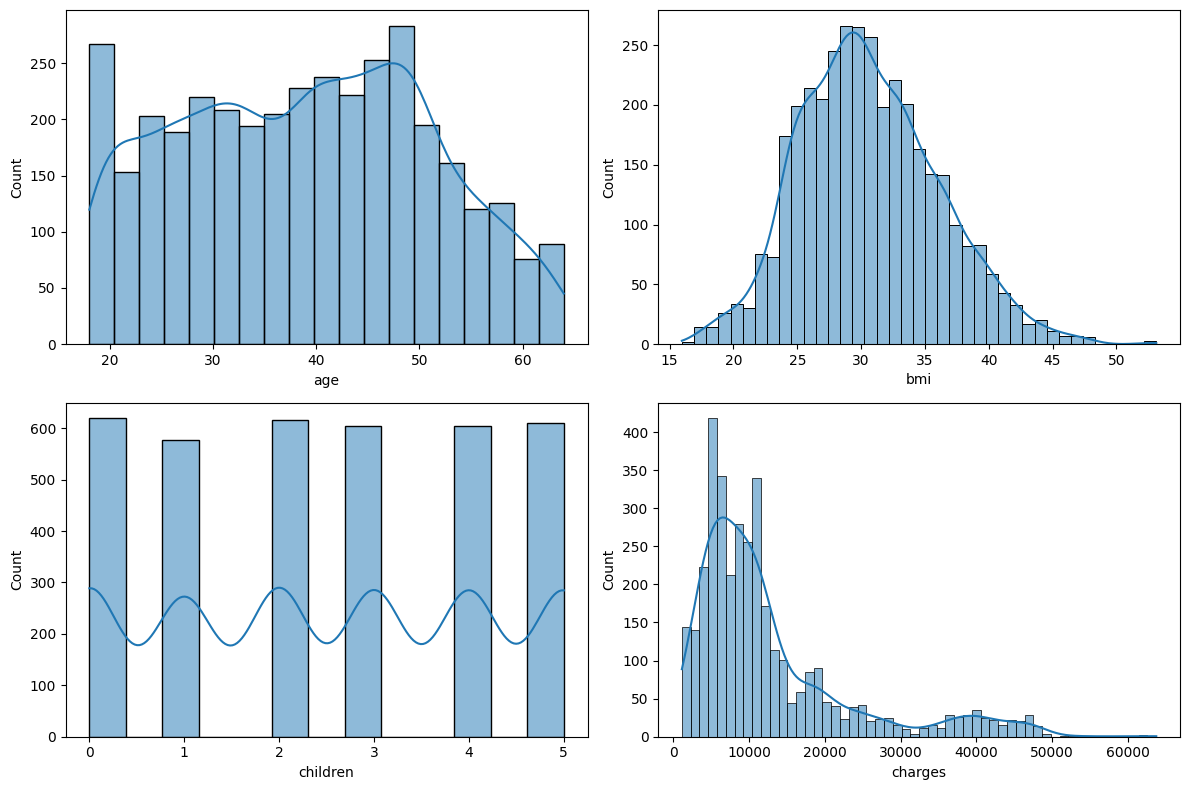

In [14]:
# Gr√°ficos de barras com kde para todas ascolunas num√©ricas
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 linhas, 2 colunas
sns.histplot(data=raw, x="age", kde=True, ax=axes[0, 0]) # linha 0, coluna 0
sns.histplot(data=raw, x="bmi", kde=True, ax=axes[0, 1]) # linha 0, coluna 1
sns.histplot(data=raw, x="children", kde=True, ax=axes[1, 0]) # linha 1, coluna 0
sns.histplot(data=raw, x="charges", kde=True, ax=axes[1, 1]) # linha 1, coluna 1
plt.tight_layout() # Espa√ßamento autom√°tico
plt.show() # Renderizar plotagem

### Boxplot

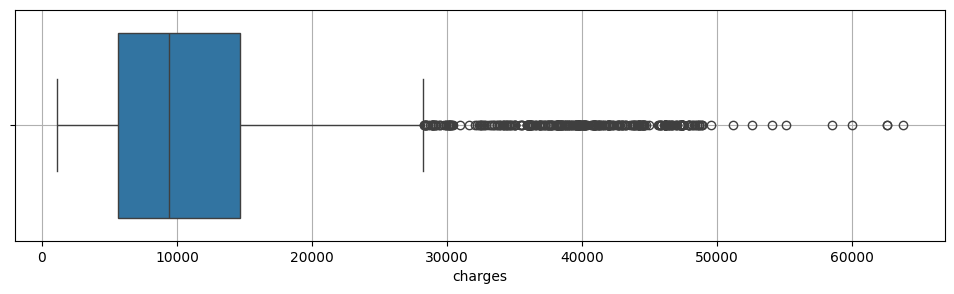

In [15]:
# Define tamanho da figura (horizontal, vertical)
plt.figure(figsize=(12, 3))
# Cria um boxplot horizontal para a coluna 'charges'
# x: Gr√°fico ser√° horizontal
# y: Gr√°fico ser√° vertical
sns.boxplot(x=raw["charges"])
# Adiciona uma grade de fundo para facilitar a leitura dos valores
plt.grid(True)
# Exibe o gr√°fico na tela
plt.show()

# Pr√©-processamento de dados

### Dados brutos

In [16]:
# Visualiza√ß√£o dos dados brutos
display(raw)

age     sex        bmi smoker     region  children       charges
0     21.000000    male  25.745000     no  northeast         2   3279.868550
1     36.976978  female  25.744165    yes  southeast         3  21454.494239
2     18.000000    male  30.030000     no  southeast         1   1720.353700
3     37.000000    male  30.676891     no  northeast         3   6801.437542
4     58.000000    male  32.010000     no  southeast         1  11946.625900
...         ...     ...        ...    ...        ...       ...           ...
3625  48.820767  female  41.426984     no  northwest         4  10987.324964
3626  38.661977  female  26.202557     no  southeast         2  11735.844352
3627  56.000000    male  40.300000     no  southwest         0  10602.385000
3628  48.061207  female  34.930624     no  southeast         1   8976.140452
3629  37.598865  female  25.219233     no  northeast         3   7027.698968

[3630 rows x 7 columns]

In [17]:
# Passando dados brutos para o dataframe que ser√° pr√©-processado
df = raw
# Convertendo object para category
df[["sex","smoker","region"]] = raw[["sex","smoker","region",]].astype("category")
# Limitando casas decimais
df["age"] = raw["age"].astype("int64")
df["bmi"] = raw["bmi"].round(2)
df["charges"] = raw["charges"].round(2)
# One-Hot Encoding nas vari√°veis categ√≥rias para otimizar a performance nos modelos
df = pd.get_dummies(df, drop_first=True)

### Classificando BMI

In [18]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return "baixo"
    elif 18.5 <= bmi < 25:
        return "normal"
    elif 25 <= bmi < 30:
        return "sobrepeso"
    else:
        return "obesidade"

df["bmi_category"] = raw["bmi"].apply(categorize_bmi).astype("category")


### Dados pr√©-processados

In [19]:
# Visualiza√ß√£o dos dados pr√©-processados
display(df.select_dtypes(include=["number", "bool", "category"]))

age    bmi  children   charges  sex_male  smoker_yes  region_northwest  \
0      21  25.74         2   3279.87      True       False             False   
1      36  25.74         3  21454.49     False        True             False   
2      18  30.03         1   1720.35      True       False             False   
3      37  30.68         3   6801.44      True       False             False   
4      58  32.01         1  11946.63      True       False             False   
...   ...    ...       ...       ...       ...         ...               ...   
3625   48  41.43         4  10987.32     False       False              True   
3626   38  26.20         2  11735.84     False       False             False   
3627   56  40.30         0  10602.38      True       False             False   
3628   48  34.93         1   8976.14     False       False             False   
3629   37  25.22         3   7027.70     False       False             False   

      region_southeast  region_southwest bmi_category  
0                False             False    sobrepeso  
1                 True             False    sobrepeso  
2                 True             False    obesidade  
3                False             False    obesidade  
4                 True             False    obesidade  
...                ...               ...          ...  
3625             False             False    obesidade  
3626              True             False    sobrepeso  
3627             False              True    obesidade  
3628              True             False    obesidade  
3629             False             False    sobrepeso  

[3630 rows x 10 columns]

# Baseline

In [20]:
# Separando colunas que ser√£o usadas para treinar o modelo
df = df[["age","sex_male","smoker_yes", "region_northwest", "region_southeast","region_southwest"]]
x = df.iloc[:,:-1]  # todas as linhas, todas as colunas menos a √∫ltima (vari√°veis independentes que ser√£o usadas para ensinar o modelo)
y = df.iloc[:,-1]   # todas as linhas, somente a √∫ltima coluna (vari√°vel dependente, que o modelo vai aprender a prever)

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predi√ß√£o baseline: o modelo sempre prev√™ a m√©dia dos valores de y
y_pred = [y.mean()] * len(y)

# Avaliando a baseline com explica√ß√µes no print
print(f"MAE (Erro Absoluto M√©dio): {mean_absolute_error(y, y_pred):.3f}  -> m√©dia dos erros absolutos entre previsto e real (quanto menor, melhor)")
print(f"MSE (Erro Quadr√°tico M√©dio): {mean_squared_error(y, y_pred):.3f}  -> m√©dia dos erros ao quadrado, penaliza erros grandes (quanto menor, melhor)")
print(f"RMSE (Raiz do Erro Quadr√°tico M√©dio): {np.sqrt(mean_squared_error(y, y_pred)):.3f}  -> erro m√©dio na unidade original da vari√°vel alvo (quanto menor, melhor)")
print(f"R¬≤ (Coeficiente de Determina√ß√£o): {r2_score(y, y_pred):.3f}  -> mede o quanto o modelo explica a variabilidade dos dados (quanto mais pr√≥ximo de 1, melhor)")


MAE (Erro Absoluto M√©dio): 0.359  -> m√©dia dos erros absolutos entre previsto e real (quanto menor, melhor)
MSE (Erro Quadr√°tico M√©dio): 0.179  -> m√©dia dos erros ao quadrado, penaliza erros grandes (quanto menor, melhor)
RMSE (Raiz do Erro Quadr√°tico M√©dio): 0.423  -> erro m√©dio na unidade original da vari√°vel alvo (quanto menor, melhor)
R¬≤ (Coeficiente de Determina√ß√£o): 0.000  -> mede o quanto o modelo explica a variabilidade dos dados (quanto mais pr√≥ximo de 1, melhor)


# Divis√£o treino e teste dos dados

In [22]:
from sklearn.model_selection import train_test_split

# Divide os dados em conjuntos de treino e teste
# x e y s√£o separados em x_train (entradas para treino), x_test (entradas para teste),
# y_train (r√≥tulos para treino) e y_test (r√≥tulos para teste)
# test_size=0.2 significa que 20% dos dados ser√£o usados para teste, e 80% para treino
# random_state=0 faz a divis√£o dos dados ser sempre a mesma, permitindo reprodutibilidade
# reprodutibilidade significa que quem rodar o c√≥digo de novo, ter√° o mesmo resultado

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Testando modelos

### Regress√£o Linear

In [23]:
# Regress√£o Linear
from sklearn.linear_model import LinearRegression
lr_reg = LinearRegression()
lr_reg = lr_reg.fit(x_train, y_train)

# Predi√ß√£o
y_pred = lr_reg.predict(x_test)

# Scores
print(f"MAE: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")
print(f"R¬≤ : {r2_score(y_test, y_pred):.3f}")

MAE: 0.247
MSE: 0.116
RMSE: 0.341
R¬≤ : 0.329


### Regress√£o Ridge

In [24]:
# Regress√£o Ridge
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
ridge_reg = ridge_reg.fit(x_train, y_train)

# Predi√ß√£o
y_pred = ridge_reg.predict(x_test)

# Scores
print(f"MAE: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")
print(f"R¬≤ : {r2_score(y_test, y_pred):.3f}")


MAE: 0.247
MSE: 0.116
RMSE: 0.341
R¬≤ : 0.329


### Regress√£o Lasso

In [25]:
# Regress√£o Lasso
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg = lasso_reg.fit(x_train, y_train)

# Predi√ß√£o
y_pred = lasso_reg.predict(x_test)

# Scores
print(f"MAE: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")
print(f"R¬≤ : {r2_score(y_test, y_pred):.3f}")


MAE: 0.354
MSE: 0.174
RMSE: 0.417
R¬≤ : -0.001


### XGBoost Regressor

In [26]:
# XGBoost Regressor
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()
xgb_reg = xgb_reg.fit(x_train, y_train)

# Predi√ß√£o
y_pred = xgb_reg.predict(x_test)

# Scores
print(f"MAE: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")
print(f"R¬≤ : {r2_score(y_test, y_pred):.3f}")


MAE: 0.220
MSE: 0.125
RMSE: 0.353
R¬≤ : 0.281


### LightGBM Regressor

In [27]:
# LightGBM Regressor
from lightgbm import LGBMRegressor
lgbm_reg = LGBMRegressor(verbose=-1)
lgbm_reg = lgbm_reg.fit(x_train, y_train)

# Predi√ß√£o
y_pred = lgbm_reg.predict(x_test)

# Scores
print(f"MAE: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")
print(f"R¬≤ : {r2_score(y_test, y_pred):.3f}")

MAE: 0.218
MSE: 0.112
RMSE: 0.335
R¬≤ : 0.354


### Random Forest Regressor

In [28]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg = rf_reg.fit(x_train, y_train)

# Predi√ß√£o
y_pred = rf_reg.predict(x_test)

# Scores
print(f"MAE: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")
print(f"R¬≤ : {r2_score(y_test, y_pred):.3f}")


MAE: 0.212
MSE: 0.122
RMSE: 0.349
R¬≤ : 0.298


- Otimizando Random Forest Regressor com Bayesian Optimization

In [29]:
# Random Forest Regressor + Bayesian Optimization
from bayes_opt import BayesianOptimization
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Fun√ß√£o de avalia√ß√£o
def rf_evaluate(n_estimators, max_depth, min_samples_split, min_samples_leaf):
    model = RandomForestRegressor(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        random_state=42
    )
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
    return np.mean(scores)

# Espa√ßo de busca
param_bounds = {
    'n_estimators': (50, 300),
    'max_depth': (5, 30),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 4)
}

# Executando Bayesian Optimization
optimizer = BayesianOptimization(f=rf_evaluate, pbounds=param_bounds, random_state=42)
optimizer.maximize(init_points=5, n_iter=15)

# Pegando os melhores hiperpar√¢metros
best_params = optimizer.max['params']
rf_reg = RandomForestRegressor(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    random_state=42
)

# Treinamento
rf_reg.fit(x_train, y_train)

# Predi√ß√£o
y_pred = rf_reg.predict(x_test)

# Avalia√ß√£o
print(f"MAE: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")
print(f"R¬≤ : {r2_score(y_test, y_pred):.3f}")


|   iter    |  target   | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------
| 1         | -0.1125   | 14.36     | 3.852     | 7.856     | 199.7     |
| 2         | -0.1079   | 8.9       | 1.468     | 2.465     | 266.5     |
| 3         | -0.1127   | 20.03     | 3.124     | 2.165     | 292.5     |
| 4         | -0.1162   | 25.81     | 1.637     | 3.455     | 95.85     |
| 5         | -0.1128   | 12.61     | 2.574     | 5.456     | 122.8     |
| 6         | -0.1078   | 8.74      | 2.153     | 3.048     | 267.7     |
| 7         | -0.1117   | 28.99     | 4.0       | 10.0      | 258.0     |
| 8         | -0.1071   | 5.0       | 4.0       | 10.0      | 254.6     |
| 9         | -0.1071   | 5.0       | 4.0       | 2.0       | 235.1     |
| 10        | -0.1071   | 5.0       | 4.0       | 10.0      | 50.0      |
| 11        | -0.1121   | 30.0      | 4.0       | 2.0       | 50.0      |
| 12        | -0.1119   | 30.0      | 

- Otimizando LightGBM Regressor com Bayesian Optmization
    - Apesar do resultado parecido com o do Random Forest, a performance do LightGBM √© melhor, por isso ele ser√° o modelo escolhido

In [30]:
# LightGBM Regressor + Bayesian Optimization
from bayes_opt import BayesianOptimization
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score

# Fun√ß√£o de avalia√ß√£o
def lgbm_evaluate(n_estimators, max_depth, num_leaves, learning_rate):
    model = LGBMRegressor(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        num_leaves=int(num_leaves),
        learning_rate=learning_rate,
        random_state=42,
        verbose=-1  # Silencia os logs
    )
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
    return np.mean(scores)

# Espa√ßo de busca
param_bounds = {
    'n_estimators': (50, 300),
    'max_depth': (5, 30),
    'num_leaves': (20, 50),
    'learning_rate': (0.01, 0.3)
}

# Executando Bayesian Optimization
optimizer = BayesianOptimization(f=lgbm_evaluate, pbounds=param_bounds, random_state=42)
optimizer.maximize(init_points=5, n_iter=15)

# Pegando os melhores hiperpar√¢metros
best_params = optimizer.max['params']
lgbm_reg = LGBMRegressor(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    num_leaves=int(best_params['num_leaves']),
    learning_rate=best_params['learning_rate'],
    random_state=42,
    verbose=-1  # Silencia os logs no treinamento final
)

# Treinamento
lgbm_reg.fit(x_train, y_train)

# Predi√ß√£o
y_pred = lgbm_reg.predict(x_test)

# Avalia√ß√£o
print(f"MAE: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")
print(f"R¬≤ : {r2_score(y_test, y_pred):.3f}")


|   iter    |  target   | learni... | max_depth | n_esti... | num_le... |
-------------------------------------------------------------------------
| 1         | -0.1138   | 0.1186    | 28.77     | 233.0     | 37.96     |
| 2         | -0.1094   | 0.05525   | 8.9       | 64.52     | 45.99     |
| 3         | -0.1128   | 0.1843    | 22.7      | 55.15     | 49.1      |
| 4         | -0.1127   | 0.2514    | 10.31     | 95.46     | 25.5      |
| 5         | -0.1124   | 0.09823   | 18.12     | 158.0     | 28.74     |
| 6         | -0.1123   | 0.2197    | 21.7      | 105.7     | 21.92     |
| 7         | -0.1074   | 0.02427   | 5.462     | 200.1     | 41.71     |
| 8         | -0.1113   | 0.1151    | 7.026     | 200.3     | 39.86     |
| 9         | -0.1076   | 0.02808   | 5.751     | 198.9     | 43.64     |
| 10        | -0.1109   | 0.2125    | 5.139     | 198.0     | 42.24     |
| 11        | -0.1132   | 0.2879    | 6.461     | 197.8     | 45.18     |
| 12        | -0.1093   | 0.07169   | 

# Teste de Generaliza√ß√£o (Overfitting e Underfitting)

- **MAE = Erro Absoluto M√©dio**
    - Se **MAE Treino < MAE Teste**, pode indicar **overfitting**.
    - Se **MAE Treino e MAE Teste forem altos e R¬≤ for baixo**, pode indicar **underfitting**.
    - Se **MAE Treino e MAE Teste forem altos e pr√≥ximos**, pode indicar **underfitting**.  
- **RMSE = Raiz do Erro Quadr√°tico M√©dio**
    - Se **RMSE Treino < RMSE Teste**, pode indicar **overfitting**.
    - Se **RMSE Treino e RMSE Teste forem altos e R¬≤ for baixo**, pode indicar **underfitting**.
    - Se **RMSE Treino e RMSE Teste forem altos e pr√≥ximos**, pode indicar **underfitting**.  
- **Compara√ß√£o entre RMSE e MAE**
    - Se **RMSE Teste ‚âà MAE Teste**, modelo **bem ajustado**, poucos erros extremos.
    - Se **RMSE Teste > MAE Teste**, modelo aceit√°vel, pode ter **alguns outliers**.
    - Se **RMSE Teste for 2x ou mais o MAE Teste**, modelo pode estar **mal ajustado**, indicando erros grandes.

In [35]:
# Predi√ß√£o no conjunto de treino
y_train_pred = lgbm_reg.predict(x_train)

# Predi√ß√£o no conjunto de teste
y_test_pred = lgbm_reg.predict(x_test)

# C√°lculo do erro em ambos os conjuntos
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"MAE Treino: {mae_train:.3f}")
print(f"MAE Teste: {mae_test:.3f}")
print(f"RMSE Treino: {rmse_train:.3f}")
print(f"RMSE Teste: {rmse_test:.3f}")
print(f"R¬≤ Treino: {r2_train:.3f}")
print(f"R¬≤ Teste: {r2_test:.3f}")


MAE Treino: 0.210
MAE Teste: 0.220
RMSE Treino: 0.318
RMSE Teste: 0.330
R¬≤ Treino: 0.440
R¬≤ Teste: 0.371


# Gr√°ficos de curva de aprendizado
- Mostra como o modelo aprende, de acordo com as m√©tricas, a medida que o tamanho dos dados de treino (que ele n√£o conhece) vai aumentando.

### üßê **Como interpretar os dados?**
1Ô∏è‚É£ **MAE (Erro Absoluto M√©dio)**  
üí° Representa o erro m√©dio nas previs√µes do modelo.  
- Se a linha **MAE Treino** estiver **muito abaixo da MAE Teste**, pode indicar **overfitting**.  
- Se ambas estiverem **altas e pr√≥ximas**, pode indicar **underfitting**.


2Ô∏è‚É£ **RMSE (Raiz do Erro Quadr√°tico M√©dio)**  
üí° Similar ao MAE, mas **penaliza erros maiores**, ent√£o valores altos podem indicar **outliers**.  
- Se o **RMSE Teste for muito maior que o RMSE Treino**, h√° risco de **overfitting**.  
- Se ambos forem altos, pode ser **underfitting**.  
- Se **RMSE estiver muito maior que o MAE**, pode significar que o modelo comete erros grandes ocasionalmente.


3Ô∏è‚É£ **R¬≤ (Coeficiente de Determina√ß√£o)**  
üí° Mede **quanto o modelo explica a varia√ß√£o dos dados** (valores entre **0 e 1**, quanto maior, melhor).  
- Se **R¬≤ Treino for muito maior que R¬≤ Teste**, √© sinal de **overfitting**.  
- Se **R¬≤ Teste for muito baixo (<0.3)**, pode indicar **underfitting**.  

---

### üîç **Como saber se o modelo est√° bom?**  
‚úî Se as curvas de treino e teste forem **parecidas e com valores baixos**, significa que o modelo est√° bem ajustado.  
‚úî Se houver **grande diferen√ßa** entre treino e teste, pode ser **overfitting**.  
‚úî Se ambas as m√©tricas forem **altas e R¬≤ for baixo**, pode ser **underfitting**.  


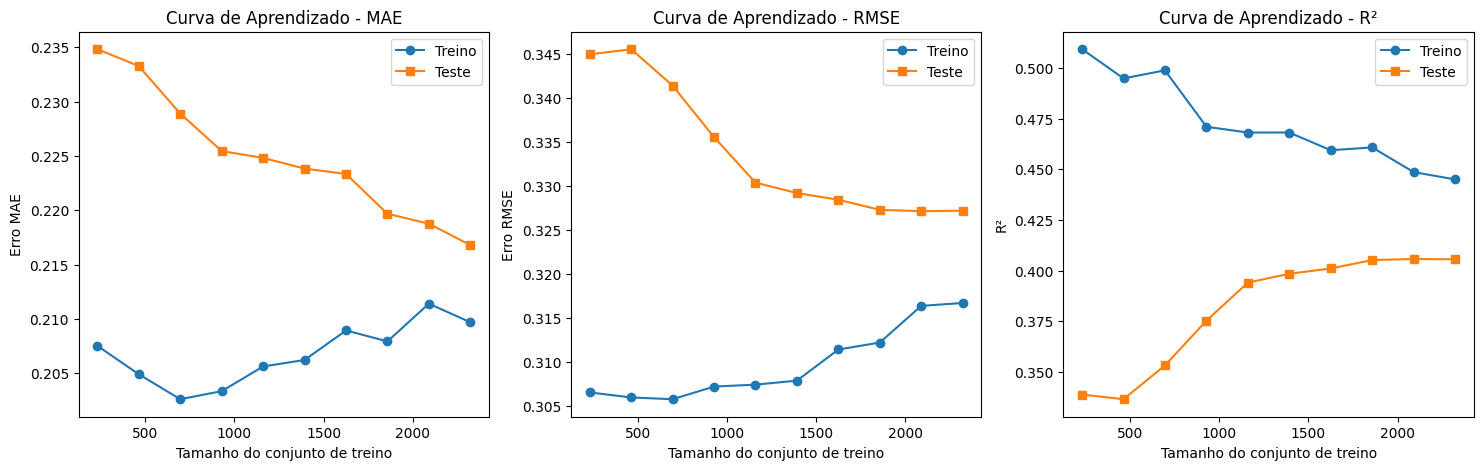

In [40]:
from sklearn.model_selection import learning_curve

# C√°lculo das curvas de aprendizado para MAE
train_sizes, train_scores, test_scores = learning_curve(
    lgbm_reg, x_train, y_train, cv=5, scoring="neg_mean_absolute_error", train_sizes=np.linspace(0.1, 1.0, 10)
)
train_mean = -np.mean(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)

# C√°lculo das curvas de aprendizado para RMSE
train_sizes_rmse, train_scores_rmse, test_scores_rmse = learning_curve(
    lgbm_reg, x_train, y_train, cv=5, scoring="neg_root_mean_squared_error", train_sizes=np.linspace(0.1, 1.0, 10)
)
train_mean_rmse = -np.mean(train_scores_rmse, axis=1)
test_mean_rmse = -np.mean(test_scores_rmse, axis=1)

# C√°lculo das curvas de aprendizado para R¬≤
train_sizes_r2, train_scores_r2, test_scores_r2 = learning_curve(
    lgbm_reg, x_train, y_train, cv=5, scoring="r2", train_sizes=np.linspace(0.1, 1.0, 10)
)
train_mean_r2 = np.mean(train_scores_r2, axis=1)
test_mean_r2 = np.mean(test_scores_r2, axis=1)

# Plotando os gr√°ficos
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# MAE
axs[0].plot(train_sizes, train_mean, label="Treino", marker="o")
axs[0].plot(train_sizes, test_mean, label="Teste", marker="s")
axs[0].set_xlabel("Tamanho do conjunto de treino")
axs[0].set_ylabel("Erro MAE")
axs[0].set_title("Curva de Aprendizado - MAE")
axs[0].legend()

# RMSE
axs[1].plot(train_sizes_rmse, train_mean_rmse, label="Treino", marker="o")
axs[1].plot(train_sizes_rmse, test_mean_rmse, label="Teste", marker="s")
axs[1].set_xlabel("Tamanho do conjunto de treino")
axs[1].set_ylabel("Erro RMSE")
axs[1].set_title("Curva de Aprendizado - RMSE")
axs[1].legend()

# R¬≤
axs[2].plot(train_sizes_r2, train_mean_r2, label="Treino", marker="o")
axs[2].plot(train_sizes_r2, test_mean_r2, label="Teste", marker="s")
axs[2].set_xlabel("Tamanho do conjunto de treino")
axs[2].set_ylabel("R¬≤")
axs[2].set_title("Curva de Aprendizado - R¬≤")
axs[2].legend()

plt.show()


# Serializa√ß√£o do modelo (Salvando modelo treinado)
- Ao salvar (serializar) o modelo, ele n√£o precisa ser treinado novamento

In [32]:
from src.utils import salvar_modelo
salvar_modelo(lgbm_reg)  # Salva o modelo no caminho padr√£o

# Desserializa√ß√£o do modelo (Carregando modelo treinado)

In [33]:
from src.utils import carregar_modelo
carregar_modelo()  # Carrega o modelo no caminho padr√£o

LGBMRegressor(learning_rate=np.float64(0.0206709573669649), max_depth=5,
              n_estimators=199, num_leaves=40, random_state=42, verbose=-1)

# Testando modelo carregado

In [34]:
# Carrega o modelo salvo no caminho padr√£o
lgbm_reg_carregado = carregar_modelo()  
# Testando o modelo carregado
y_pred_carregado = lgbm_reg_carregado.predict(x_test)

# Avalia√ß√£o
print(f"MAE: {mean_absolute_error(y_test, y_pred_carregado):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_carregado):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_carregado)):.3f}")
print(f"R¬≤ : {r2_score(y_test, y_pred_carregado):.3f}")

MAE: 0.220
MSE: 0.109
RMSE: 0.330
R¬≤ : 0.371
